Importing the dependencies

In [506]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Data Collection And Analysis
PIMA Diabetes Dataset

In [507]:
#loading diabetes dataset to pandas dataframe
df=pd.read_csv('/content/diabetes.csv')
diabetes_df=df.copy()

In [508]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50.0,1
1,1,85,66,29.0,0,26.6,0.351,31.0,0
2,8,183,64,NaN,0,23.3,0.672,NaN,1
3,1,89,66,23.0,94,28.1,0.167,21.0,0
4,0,137,40,35.0,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63.0,0
764,2,122,70,27.0,0,36.8,0.340,27.0,0
765,5,121,72,23.0,112,26.2,0.245,30.0,0
766,1,126,60,0.0,0,30.1,0.349,47.0,1


In [509]:
diabetes_df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               25
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                         71
Outcome                      0
dtype: int64

In [510]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             743 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       697 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


<Axes: >

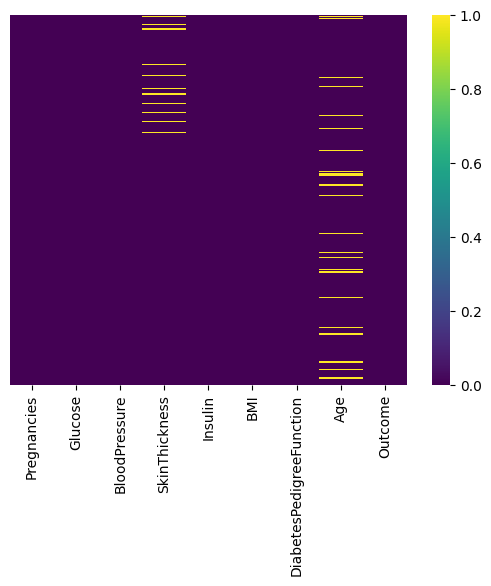

In [511]:
#heatmap
import seaborn as sns
sns.heatmap(diabetes_df.isnull(),yticklabels=False,cbar=True,cmap="viridis")

<ipython-input-512-a3786ae00d7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Age)


<Axes: xlabel='Age', ylabel='Density'>

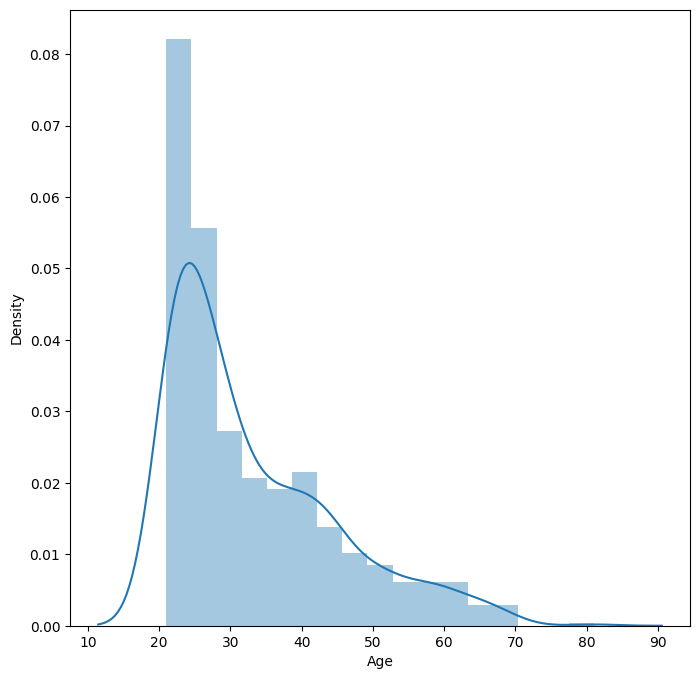

In [512]:
#distribution of data in age
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(diabetes_df.Age)



<ipython-input-513-2fcc0f9ea930>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

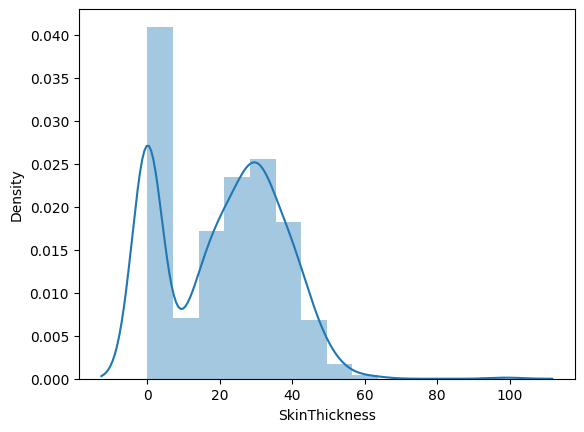

In [513]:
sns.distplot(diabetes_df.SkinThickness)

<ipython-input-514-6d99d7eb254e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

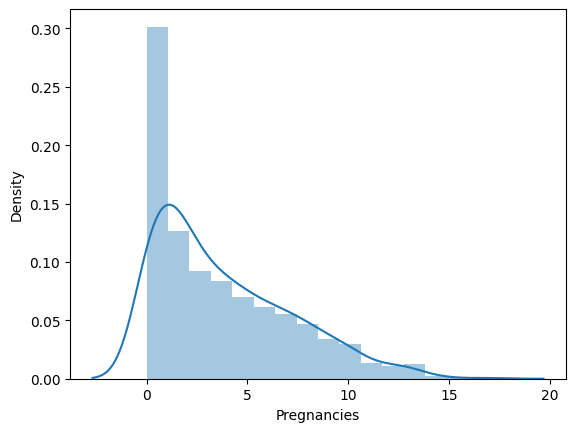

In [514]:
sns.distplot(diabetes_df.Pregnancies)

<ipython-input-515-6aef5e1f755c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

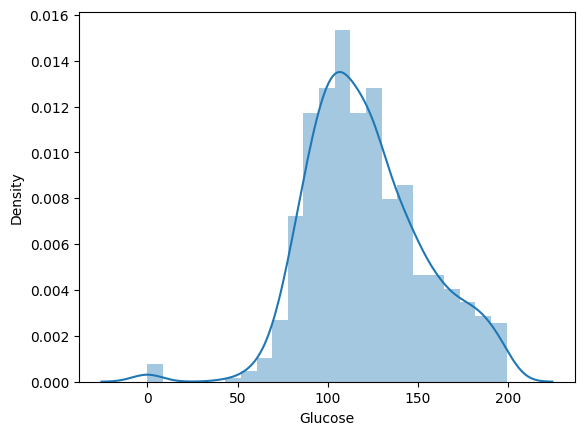

In [515]:
sns.distplot(diabetes_df.Glucose)


<ipython-input-516-9385a01ab079>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

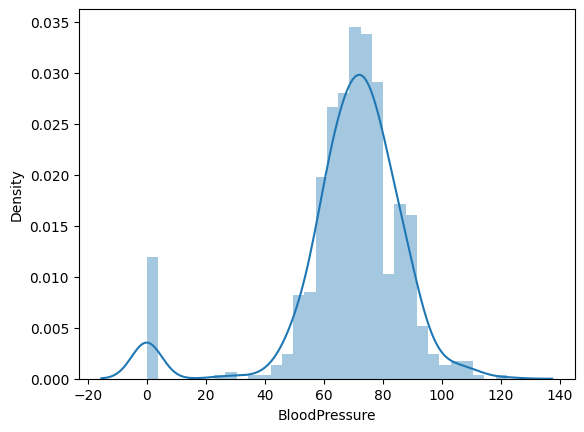

In [516]:
sns.distplot(diabetes_df.BloodPressure)

<ipython-input-517-80c25523b1df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

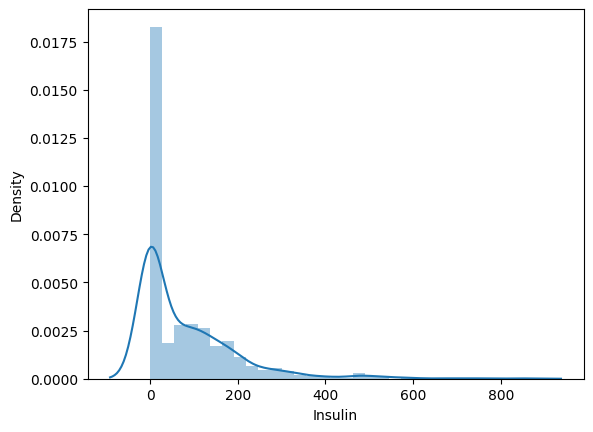

In [517]:
sns.distplot(diabetes_df.Insulin)

<ipython-input-518-d512f55bcf04>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

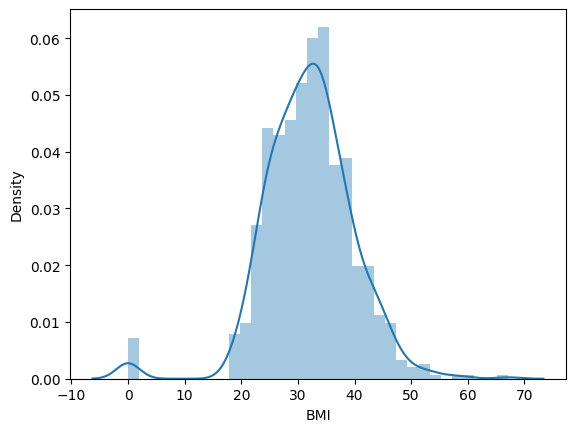

In [518]:
sns.distplot(diabetes_df.BMI)


<ipython-input-519-d282ce82f0d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.DiabetesPedigreeFunction)


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

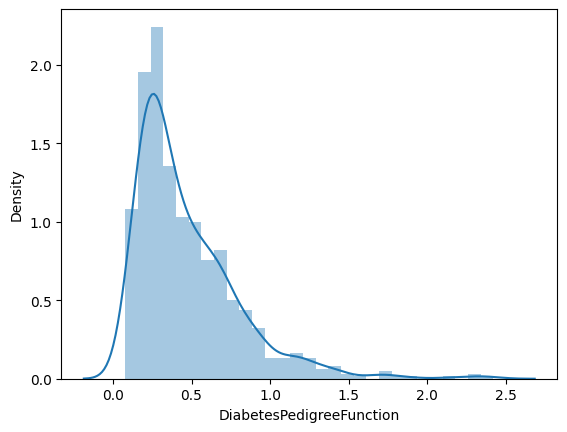

In [519]:
sns.distplot(diabetes_df.DiabetesPedigreeFunction)

In [520]:
#replace the missing values with median values
diabetes_df['Age'].fillna(diabetes_df['Age'].median(),inplace=True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(),inplace=True)

In [521]:
def find_outliers(col):
  from scipy import stats
  z=np.abs(stats.zscore(col))
  idx_outliers=np.where(z>3,True,False)
  return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(diabetes_df.BMI)
idx1=find_outliers(diabetes_df.Glucose)
idx2=find_outliers(diabetes_df.BloodPressure)
idx3=find_outliers(diabetes_df.Insulin)
idx4=find_outliers(diabetes_df.DiabetesPedigreeFunction)
idx

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [522]:
display(diabetes_df.loc[idx==True].describe().round(3))
display(diabetes_df.loc[idx1==True].describe().round(3))
display(diabetes_df.loc[idx2==True].describe().round(3))
display(diabetes_df.loc[idx3==True].describe().round(3))
display(diabetes_df.loc[idx4==True].describe().round(3))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000
mean,3.286,112.786,43.214,13.571,33.786,13.129,0.599,29.143,0.286
std,3.384,27.096,46.161,21.103,71.595,26.167,0.673,14.250,0.469
min,0.000,74.000,0.000,0.000,0.000,0.000,0.102,21.000,0.000
25%,0.000,96.000,0.000,0.000,0.000,0.000,0.238,22.000,0.000
50%,2.500,114.500,32.000,0.000,0.000,0.000,0.304,24.500,0.000
75%,5.750,124.500,81.000,23.000,10.500,0.000,0.623,26.000,0.750
max,10.000,180.000,110.000,63.000,240.000,67.100,2.420,69.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5.00,5.0,5.000,5.000,5.000,5.000,5.000,5.000,5.000
mean,2.80,0.0,67.600,30.200,4.600,32.880,0.380,27.800,0.400
std,2.49,0.0,12.033,8.643,10.286,7.034,0.216,6.221,0.548
min,1.00,0.0,48.000,20.000,0.000,24.700,0.140,22.000,0.000
25%,1.00,0.0,68.000,23.000,0.000,27.700,0.299,22.000,0.000
50%,1.00,0.0,68.000,32.000,0.000,32.000,0.346,29.000,0.000
75%,5.00,0.0,74.000,35.000,0.000,39.000,0.389,29.000,1.000
max,6.00,0.0,80.000,41.000,23.000,41.000,0.727,37.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,35.000,35.000,35.0,35.000,35.0,35.000,35.000,35.000,35.000
mean,3.629,117.800,0.0,1.514,0.0,25.706,0.388,29.257,0.457
std,3.647,27.489,0.0,6.298,0.0,14.875,0.254,6.294,0.505
min,0.000,73.000,0.0,0.000,0.0,0.000,0.102,21.000,0.000
25%,0.000,97.500,0.0,0.000,0.0,21.650,0.198,25.000,0.000
50%,2.000,117.000,0.0,0.000,0.0,28.900,0.282,29.000,0.000
75%,6.000,133.500,0.0,0.000,0.0,34.550,0.573,31.000,1.000
max,13.000,183.000,0.0,30.000,0.0,52.300,0.933,44.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000
mean,3.111,165.833,73.444,35.333,548.833,36.961,0.661,34.722,0.667
std,2.888,20.057,11.638,9.107,107.813,5.988,0.625,13.663,0.485
min,0.000,124.000,52.000,23.000,440.000,28.700,0.128,21.000,0.000
25%,1.000,155.000,63.500,26.250,480.000,31.375,0.244,23.500,0.000
50%,2.000,168.500,72.000,35.500,502.500,37.550,0.540,29.500,1.000
75%,4.750,180.000,83.500,43.500,570.500,40.300,0.687,45.250,1.000
max,8.000,197.000,90.000,49.000,846.000,52.300,2.329,60.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,11.000,11.000,11.000,11.000,11.000,11.000,11.000,11.000,11.000
mean,1.909,140.909,67.273,30.182,170.000,33.055,1.914,28.273,0.364
std,2.468,37.920,13.154,16.940,240.219,15.139,0.324,6.198,0.505
min,0.000,82.000,40.000,0.000,0.000,0.000,1.476,21.000,0.000
25%,0.000,118.000,61.000,21.000,0.000,25.950,1.699,25.000,0.000
50%,2.000,137.000,70.000,24.000,89.000,36.700,1.781,25.000,0.000
75%,2.500,176.500,77.000,39.000,221.500,41.250,2.212,30.000,1.000
max,8.000,197.000,82.000,63.000,744.000,59.400,2.420,44.000,1.000


In [523]:
display(diabetes_df.loc[idx==False].describe().round(3))
diabetes_df=diabetes_df.loc[idx==False]
display(diabetes_df.loc[idx1==False].describe().round(3))
diabetes_df=diabetes_df.loc[idx1==False]
display(diabetes_df.loc[idx2==False].describe().round(3))
diabetes_df=diabetes_df.loc[idx2==False]
display(diabetes_df.loc[idx3==False].describe().round(3))
diabetes_df=diabetes_df.loc[idx3==False]
display(diabetes_df.loc[idx4==False].describe().round(3))
diabetes_df=diabetes_df.loc[idx4==False]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,754.000,754.000,754.000,754.000,754.000,754.000,754.000,754.000,754.000
mean,3.855,121.045,69.586,21.077,80.654,32.343,0.470,32.798,0.350
std,3.371,32.052,18.224,15.548,115.756,6.690,0.322,11.241,0.477
min,0.000,0.000,0.000,0.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,36.500,32.250,0.376,29.000,0.000
75%,6.000,141.000,80.000,32.000,128.750,36.600,0.626,39.000,1.000
max,17.000,199.000,122.000,99.000,846.000,55.000,2.329,81.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000,749.000
mean,3.862,121.853,69.599,21.016,81.162,32.339,0.470,32.832,0.350
std,3.376,30.588,18.263,15.569,115.972,6.692,0.323,11.262,0.477
min,0.000,44.000,0.000,0.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,38.000,32.300,0.376,29.000,0.000
75%,6.000,141.000,80.000,32.000,130.000,36.600,0.626,39.000,1.000
max,17.000,199.000,122.000,99.000,846.000,55.000,2.329,81.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,721.000,721.000,721.000,721.000,721.000,721.000,721.000,721.000,721.000
mean,3.878,121.791,72.302,21.759,84.313,32.347,0.472,32.922,0.343
std,3.363,30.737,12.281,15.336,117.075,6.642,0.325,11.404,0.475
min,0.000,44.000,24.000,0.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,8.000,0.000,27.500,0.245,24.000,0.000
50%,3.000,117.000,72.000,23.000,48.000,32.300,0.378,29.000,0.000
75%,6.000,142.000,80.000,33.000,130.000,36.600,0.626,39.000,1.000
max,17.000,199.000,122.000,99.000,846.000,55.000,2.329,81.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000,703.000,703.000,703.000,703.000,703.000,703.000,703.000,703.000
mean,3.898,120.663,72.273,21.411,72.420,32.229,0.467,32.876,0.334
std,3.374,30.136,12.304,15.309,90.011,6.619,0.313,11.348,0.472
min,0.000,44.000,24.000,0.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.400,0.245,24.000,0.000
50%,3.000,116.000,72.000,23.000,43.000,32.000,0.375,29.000,0.000
75%,6.000,139.000,80.000,32.000,125.500,36.400,0.619,39.000,1.000
max,17.000,199.000,122.000,99.000,415.000,55.000,2.288,81.000,1.000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,696.000,696.000,696.000,696.000,696.000,696.000,696.000,696.000,696.000
mean,3.917,120.609,72.359,21.398,72.346,32.224,0.454,32.907,0.335
std,3.376,30.126,12.260,15.341,89.881,6.602,0.284,11.383,0.472
min,0.000,44.000,24.000,0.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.400,0.245,24.000,0.000
50%,3.000,115.000,72.000,23.000,43.500,32.050,0.370,29.000,0.000
75%,6.000,139.000,80.000,32.000,125.250,36.325,0.605,39.000,1.000
max,17.000,199.000,122.000,99.000,415.000,55.000,1.461,81.000,1.000


In [524]:
df_outliers=pd.DataFrame()
for col in df.describe().columns:
  df_outliers[col]=find_outliers(diabetes_df[col])
df_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False


In [525]:
test_outs=df_outliers.apply(lambda x:np.any(x),axis=1)

In [526]:
print(len(test_outs),df_outliers.shape)
test_outs

696 (696, 9)


0      False
1      False
2      False
3      False
5      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 696, dtype: bool

In [527]:
np.sum(test_outs)

33

In [528]:
df_clean=diabetes_df.loc[test_outs==False]
df_clean.describe()
diabetes_df=df_clean

<ipython-input-529-52febba1a34b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.BMI,ax=axes[0][0])
<ipython-input-529-52febba1a34b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Glucose,ax=axes[0][1])
<ipython-input-529-52febba1a34b>:6: UserWarning: 

`distplot` is a

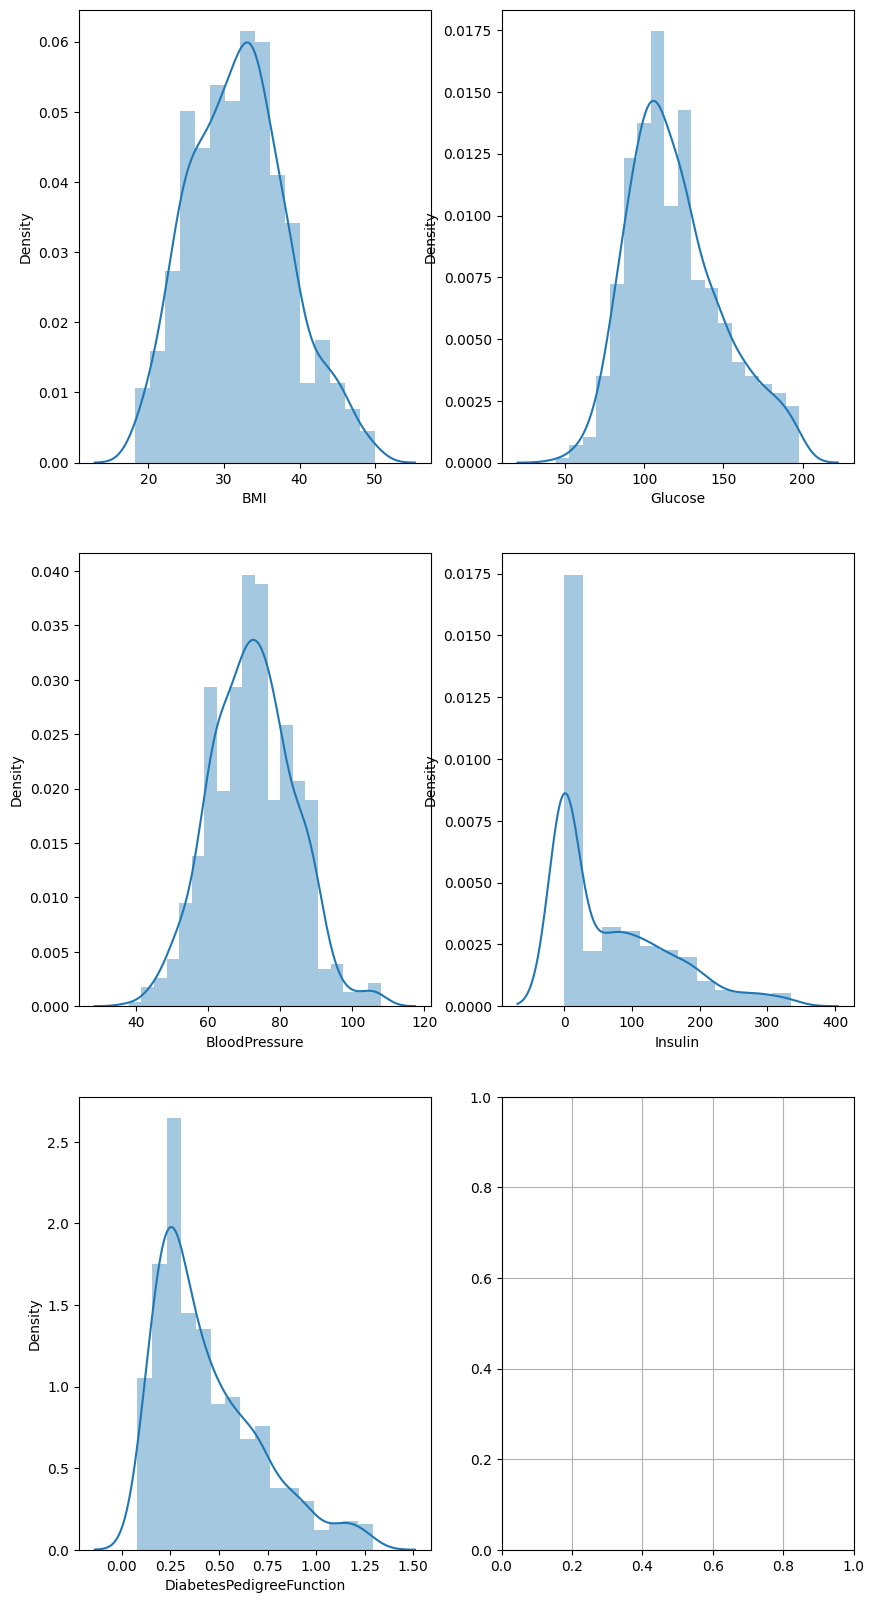

In [529]:
f,axes=plt.subplots(3,2,figsize=(10,20))
sns.distplot(diabetes_df.BMI,ax=axes[0][0])
plt.grid()
sns.distplot(diabetes_df.Glucose,ax=axes[0][1])
plt.grid()
sns.distplot(diabetes_df.BloodPressure,ax=axes[1][0])
plt.grid()
sns.distplot(diabetes_df.Insulin,ax=axes[1][1])
plt.grid()
sns.distplot(diabetes_df.DiabetesPedigreeFunction,ax=axes[2][0])
plt.grid()

In [530]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

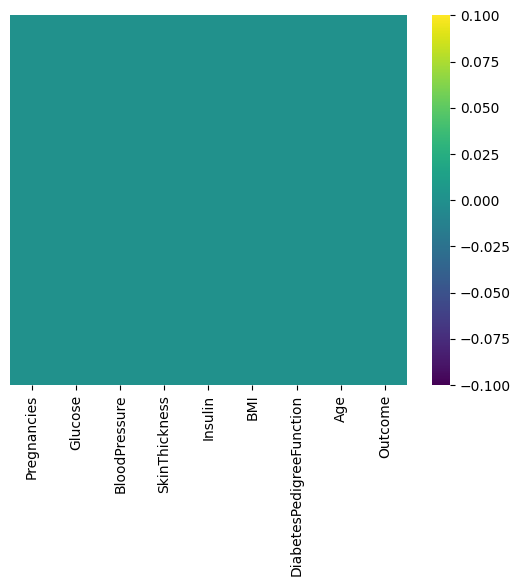

In [531]:
sns.heatmap(diabetes_df.isnull(),yticklabels=False,cbar=True,cmap="viridis")

In [532]:
diabetes_df.shape

(663, 9)

In [533]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154614,0.215797,-0.092597,-0.094486,0.040603,0.000952,0.528851,0.241065
Glucose,0.154614,1.000000,0.237370,0.012857,0.255382,0.196233,0.066116,0.241782,0.490638
BloodPressure,0.215797,0.237370,1.000000,0.042274,-0.034030,0.307080,0.033880,0.333496,0.190532
SkinThickness,-0.092597,0.012857,0.042274,1.000000,0.462058,0.378410,0.150030,-0.142780,0.045772
Insulin,-0.094486,0.255382,-0.034030,0.462058,1.000000,0.185041,0.195903,-0.065586,0.104582
BMI,0.040603,0.196233,0.307080,0.378410,0.185041,1.000000,0.131511,0.061163,0.281973
DiabetesPedigreeFunction,0.000952,0.066116,0.033880,0.150030,0.195903,0.131511,1.000000,0.041320,0.201347
Age,0.528851,0.241782,0.333496,-0.142780,-0.065586,0.061163,0.041320,1.000000,0.206625
Outcome,0.241065,0.490638,0.190532,0.045772,0.104582,0.281973,0.201347,0.206625,1.000000


In [534]:
diabetes_df.corrwith(diabetes_df.Outcome)

Pregnancies                 0.241065
Glucose                     0.490638
BloodPressure               0.190532
SkinThickness               0.045772
Insulin                     0.104582
BMI                         0.281973
DiabetesPedigreeFunction    0.201347
Age                         0.206625
Outcome                     1.000000
dtype: float64

<Axes: >

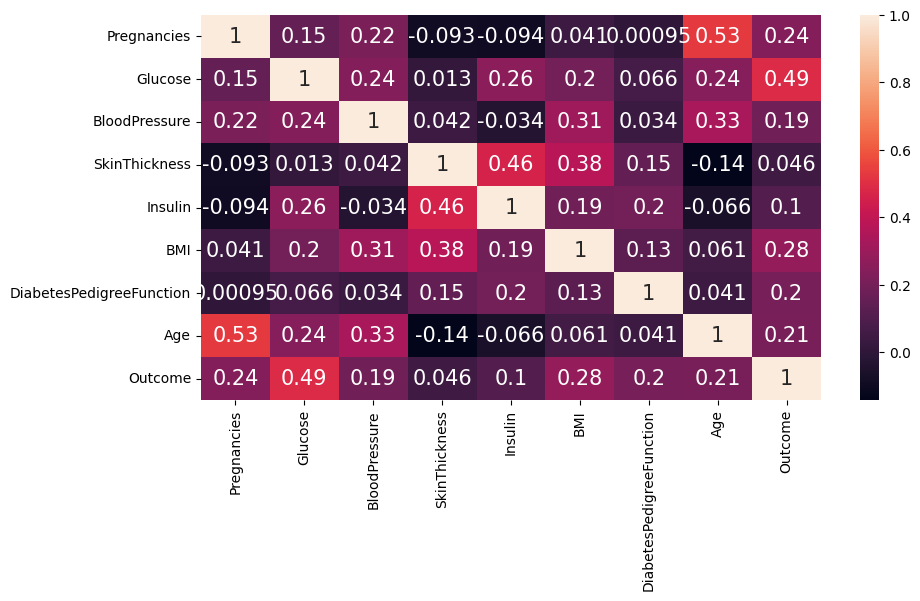

In [535]:
plt.figure(figsize = (10, 5))
sns.heatmap(diabetes_df.corr(), annot = True, annot_kws = {"size":15})

In [536]:
#statistical measures of the data
diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,3.852187,119.583710,72.286576,21.135747,68.761689,32.071493,0.441163,32.523379,0.324284
std,3.300992,29.656877,11.497901,14.992535,84.273332,6.452334,0.266151,10.947098,0.468460
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.350000,0.244000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,40.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,137.500000,80.000000,32.000000,122.000000,36.100000,0.592000,38.000000,1.000000
max,14.000000,198.000000,108.000000,60.000000,335.000000,50.000000,1.292000,67.000000,1.000000


In [537]:
diabetes_df.Outcome.value_counts() #diabetes_df['Outcome'].value_counts()

0    448
1    215
Name: Outcome, dtype: int64

0---->Non Diabetic
1----->Diabetic

In [538]:
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.301339,109.511161,70.770089,20.660714,62.660714,30.812054,0.404067,30.957589
1,5.000000,140.572093,75.446512,22.125581,81.474419,34.695814,0.518460,35.786047


In [539]:
#Separating data and labels
X=diabetes_df.drop('Outcome',axis=1)

In [540]:
Y=diabetes_df['Outcome']

In [541]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,0,33.6,0.627,50.0
1,1,85,66,29.0,0,26.6,0.351,31.0
2,8,183,64,23.0,0,23.3,0.672,29.0
3,1,89,66,23.0,94,28.1,0.167,21.0
5,5,116,74,0.0,0,25.6,0.201,30.0


In [542]:
Y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 663, dtype: int64

Data Standardization

In [543]:
scaler=StandardScaler()

In [544]:
scaler.fit(X)

StandardScaler()

In [545]:
standardized_data=scaler.transform(X)

In [546]:
standardized_data

array([[ 0.6511481 ,  0.95889205, -0.02494303, ...,  0.23707093,
         0.69876731,  1.59766692],
       [-0.86469175, -1.16700828, -0.54717137, ..., -0.84862689,
        -0.33902209, -0.13926328],
       [ 1.25748404,  2.13994779, -0.72124749, ..., -1.36045586,
         0.86797211, -0.32209803],
       ...,
       [ 0.34798013,  0.04779191, -0.02494303, ..., -0.91066676,
        -0.73759339, -0.23068066],
       [-0.86469175,  0.21651416, -1.06939972, ..., -0.30577798,
        -0.34654231,  1.32341478],
       [-0.86469175, -0.89705268, -0.19901915, ..., -0.25924808,
        -0.47438593, -0.87060231]])

In [547]:
X=standardized_data
Y=diabetes_df['Outcome']

In [548]:
print(X)
print(Y)

[[ 0.6511481   0.95889205 -0.02494303 ...  0.23707093  0.69876731
   1.59766692]
 [-0.86469175 -1.16700828 -0.54717137 ... -0.84862689 -0.33902209
  -0.13926328]
 [ 1.25748404  2.13994779 -0.72124749 ... -1.36045586  0.86797211
  -0.32209803]
 ...
 [ 0.34798013  0.04779191 -0.02494303 ... -0.91066676 -0.73759339
  -0.23068066]
 [-0.86469175  0.21651416 -1.06939972 ... -0.30577798 -0.34654231
   1.32341478]
 [-0.86469175 -0.89705268 -0.19901915 ... -0.25924808 -0.47438593
  -0.87060231]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 663, dtype: int64


Train Test Split

In [549]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [550]:
print(X.shape,X_train.shape,X_test.shape)

(663, 8) (530, 8) (133, 8)


Support Vector Machine

In [551]:
#from sklearn.linear_model import LogisticRegression
classifier=svm.SVC(kernel="linear")
#classifier=LogisticRegression()

In [552]:
#training svmc
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [553]:
#accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

Printing accuracy score

In [554]:
print(training_data_accuracy)

0.7981132075471699


In [555]:
#accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
svm_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print(svm_data_accuracy)
print(classification_report(Y_test,X_test_prediction))
print(confusion_matrix(Y_test,X_test_prediction))

#                 predicted
# actual    class-0      class-1
# class-0      TN           FP
# class-1      FN           TP

0.7669172932330827
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        90
           1       0.71      0.47      0.56        43

    accuracy                           0.77       133
   macro avg       0.75      0.69      0.70       133
weighted avg       0.76      0.77      0.75       133

[[82  8]
 [23 20]]


Logistic Regression

In [556]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [557]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [558]:
log_train_prediction=clf.predict(X_train)
print(accuracy_score(Y_train,log_train_prediction))

0.7981132075471699


In [559]:
log_test_prediction=clf.predict(X_test)
log_data_accuracy=accuracy_score(Y_test,log_test_prediction)
print(log_data_accuracy)

0.7593984962406015


In [560]:
print(classification_report(Y_test,log_test_prediction))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        90
           1       0.68      0.49      0.57        43

    accuracy                           0.76       133
   macro avg       0.73      0.69      0.70       133
weighted avg       0.75      0.76      0.75       133



In [561]:
print(confusion_matrix(Y_test,log_test_prediction))

[[80 10]
 [22 21]]


Random Forest Classifier

In [562]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier()

In [563]:
rclf.fit(X_train,Y_train)

RandomForestClassifier()

In [564]:
train_predictions=rclf.predict(X_train)
print(accuracy_score(Y_train,train_predictions))

1.0


In [565]:
test_predictions=rclf.predict(X_test)
random_data_accuracy=accuracy_score(Y_test,test_predictions)
print(random_data_accuracy)

0.7669172932330827


Naive Bayes

In [566]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [567]:
nb.fit(X_train,Y_train)

GaussianNB()

In [568]:
x_train_pred=nb.predict(X_train)
print(accuracy_score(Y_train,x_train_pred))

0.7849056603773585


In [569]:
x_test_pred=nb.predict(X_test)
bayes_data_accuracy=accuracy_score(Y_test,x_test_pred)
print(bayes_data_accuracy)

0.6992481203007519


In [570]:
print(classification_report(Y_test,x_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        90
           1       0.54      0.49      0.51        43

    accuracy                           0.70       133
   macro avg       0.65      0.64      0.65       133
weighted avg       0.69      0.70      0.70       133



In [571]:
print(confusion_matrix(Y_test,x_test_pred))

[[72 18]
 [22 21]]


KNN Classifier

In [572]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5,metric="euclidean",n_jobs=-1)

In [573]:
kn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [574]:
xtrain_predict=kn.predict(X_train)
print(accuracy_score(Y_train,xtrain_predict))

0.8226415094339623


In [575]:
xtest_predict=kn.predict(X_test)
knn_data_accuracy=accuracy_score(Y_test,xtest_predict)
print(knn_data_accuracy)

0.7819548872180451


In [576]:
print(classification_report(Y_test,xtest_predict))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        90
           1       0.79      0.44      0.57        43

    accuracy                           0.78       133
   macro avg       0.79      0.69      0.71       133
weighted avg       0.78      0.78      0.76       133



In [577]:
print(confusion_matrix(Y_test,xtest_predict))

[[85  5]
 [24 19]]


Comparing accuracy scores of 5 models

0.7669172932330827 0.7593984962406015 0.6992481203007519 0.7819548872180451


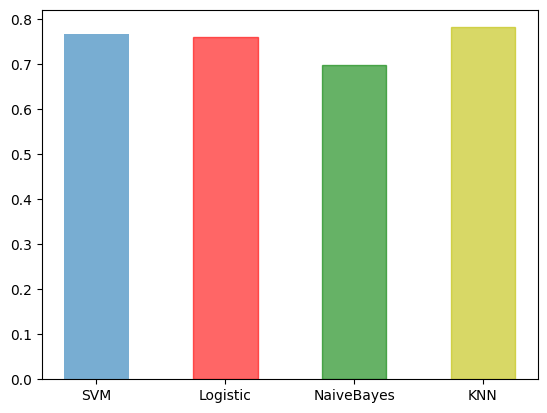

In [578]:
models=["SVM","Logistic","NaiveBayes","KNN"]
accuracies=[svm_data_accuracy,log_data_accuracy,bayes_data_accuracy,knn_data_accuracy]
barlist=plt.bar(models,accuracies,width=0.5,alpha=0.6)

barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('y')
print(svm_data_accuracy,log_data_accuracy,bayes_data_accuracy,knn_data_accuracy)

Making a Predictive System

In [579]:
input_data=(4,110,92,0,37,6,0.191,30)
#changing input to numpy array
input_data_numpy_arr=np.asarray(input_data)

#reshape the array as we are predicting one instance
input_data_reshaped=input_data_numpy_arr.reshape(1,-1)

#standardize input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if prediction[0]:
  print("The person is diabetic")
else:
  print("The person is not diabetic")

[[ 0.04481216 -0.32339703  1.71581811 -1.41081572 -0.37717352 -4.04368046
  -0.94063914 -0.23068066]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [580]:
import pickle

In [581]:
filename='diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))